# Introduction

    Retail Data Analytics (RDA) is used nowadays from shops in order to better predict the amount of products, that might get sold and therefore to better estimate how much products should be produced. This is very important, because the amount of sold products can vary from time to time.

## Features Information

    1.Order ID: Order identification number for each product
    2.Product: Product name
    3.Quantity Ordered: Amount of items
    4.Price Each: Price of each product per item in dollars
    5.Order Date: Date of purchase
    6.Purchase Address: Address of purchase order

In [25]:
# Importing imp libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msmso

In [33]:
all_data = pd.read_excel(r'C:\Users\judaybhx\OneDrive - Intel Corporation\Desktop\Data Science\EDA\all_data_copy.xlsx')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [34]:
all_data.shape

(373700, 6)

Data set contains 373700 rows and 6 columns

In [35]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


## Type of Features 

| Name of Feature | Type of Feature |
|-----------------|-----------------|
| Order ID | Object|
| Product | Object|
| Quantity Ordered | Object|
| Price Each | Object|
| Order Date | Object|
| Purchase Address | Object|

## Cleaning the data

### Handling Missing Data

In [36]:
# To know how many rows contains nan values
nan_data = all_data[all_data.isnull().any(axis=1)]
nan_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
372026,NaN,NaN,NaN,NaN,NaN,NaN
372288,NaN,NaN,NaN,NaN,NaN,NaN
372892,NaN,NaN,NaN,NaN,NaN,NaN
373398,NaN,NaN,NaN,NaN,NaN,NaN


By the above result, I observed that all columns in above contains nan values. So, we can remove all the rows contains the missing values.

### Drop rows containing NAN

In [37]:
all_data = all_data.dropna(how = 'all')

In [38]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### find 'Or' in month column and delete it

In [39]:
temp = all_data[all_data['Order ID'].str[0:2] == 'Or']
temp

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
372014,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
372401,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


There is a lot of invalid data in the dataset. So, I am going to removing all the invalid data

In [41]:
# Fill all_data with rows not containing 'Or'
all_data = all_data[all_data['Order ID'] !='Or']

In [44]:
all_data.shape

(372610, 6)

### let's convert columns into correct type

In [80]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # convert into 'int' because it is string type
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])  # convert into 'float' because it is string type
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


### Argument data with additonal colums

### Add Month Column

In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [73]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [77]:
all_data['Month'] = all_data['Order Date'].dt.month

In [79]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
373696,259354.0,iPhone,1.0,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
373697,259355.0,iPhone,1.0,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9
373699,259357.0,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",9


### Adding Sales column

In [81]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99


### Adding City Column

In [120]:
## Extracting city from Purchase Address feature
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
## there are different states with same city so I am extracting city name also
all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + '(' +get_state(x) + ')')
 

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston(MA)
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland(OR)
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco(CA)
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles(CA)
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin(TX)


Now we have the city columnn ready

### Which City had the highest sales overall?

In [121]:
result = all_data.groupby('City').sum()

In [122]:
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta(GA),33204.0,5559816.40,209588,5590997.16
Austin(TX),22306.0,3619747.22,139658,3639163.50
Boston(MA),45056.0,7274819.54,282224,7323284.02
Dallas(TX),33460.0,5505255.64,209240,5535950.80
Los Angeles(CA),66578.0,10842870.46,416650,10905141.60
New York City(NY),55864.0,9270741.66,351482,9328634.86
Portland(ME),5500.0,894378.50,34288,899516.54
Portland(OR),22606.0,3721116.44,141242,3741464.68
San Francisco(CA),100478.0,16422923.48,631040,16524407.82


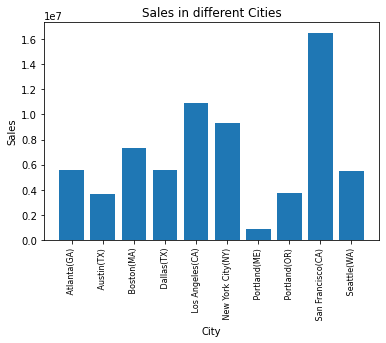

In [128]:
cities =[city for city,df in all_data.groupby('City')]

plt.bar(cities ,result['Sales'])
plt.xticks(cities,rotation ='vertical', size=8)
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Sales in different Cities")
plt.show()

By the graph and above results, we can say that **San Francisco(CA)** has highest number of sales of electronics products.

### Which Month had the highest amount of sales overall?

In [113]:
results = all_data.groupby('Month').sum()

In [114]:
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,21806.0,3623536.76,3644513.46
2,26898.0,4377769.44,4404044.84
3,34010.0,5582415.66,5614200.76
4,41116.0,6735342.04,6781340.48
5,37334.0,6270250.26,6305213.50
6,30506.0,5124051.22,5155604.52
7,32144.0,5265079.12,5295551.52
8,26896.0,4460690.84,4488935.76
9,26218.0,4169984.18,4195120.26


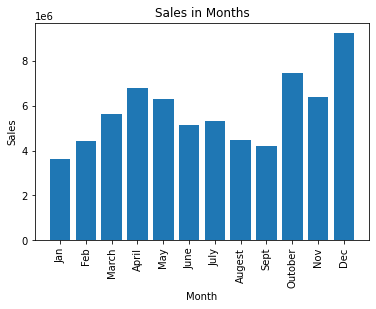

In [115]:
months = range(1,13)
plt.bar(months ,results['Sales'])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(range(1,13),['Jan','Feb','March','April','May','June','July','Augest','Sept','Outober','Nov','Dec'],rotation='vertical')
plt.title("Sales in Months")
plt.show()

By the above graph, I observed that the **December** month having the highest number of sales in the year.

### Most bought products per city.

In [142]:
all_data['Product'].nunique()

19

In [166]:
Products = all_data.groupby('City')['Product'].value_counts()
Products = pd.DataFrame(Products)
print(Products.to_string())

                                               Product
City               Product                            
 Atlanta(GA)       USB-C Charging Cable           3546
                   Lightning Charging Cable       3508
                   AA Batteries (4-pack)          3322
                   AAA Batteries (4-pack)         3196
                   Wired Headphones               2890
                   Apple Airpods Headphones       2526
                   Bose SoundSport Headphones     2154
                   27in FHD Monitor               1168
                   iPhone                         1084
                   27in 4K Gaming Monitor          984
                   34in Ultrawide Monitor          956
                   Google Phone                    902
                   Flatscreen TV                   810
                   Macbook Pro Laptop              758
                   ThinkPad Laptop                 714
                   20in Monitor                    676
          

Below table indicates **Most Bought products per city**

| City Name | Most bought Product | Count |
|-----------|---------------------|-------|
| Atlanta(GA) | USB-C Charging Cable | 3546 |
| Austin(TX) | Lightning Charging Cable | 2454 |
| Boston(MA) | USB-C Charging Cable | 4666 |
| Dallas(TX) | Lightning Charging Cable | 3440 |
| Los Angeles(CA) | Lightning Charging Cable | 7024 |
| New York City(NY) | USB-C Charging Cable | 5956 |
| Portland(ME) |  USB-C Charging Cable | 622 |
| Portland(OR) | Lightning Charging Cable | 2358 |
| San Francisco(CA) | USB-C Charging Cable | 10736 |
| Seattle(WA) | USB-C Charging Cable | 3408 |

By the Analysis I observed that **San Francisco(CA)** has the highest sales among all the cities. So, **San Francisco(CA)** is the best city for establishing a new branch for the retail store.

## Distribution of sales over different times of the day

In [167]:
all_data["Hour"] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston(MA),21
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland(OR),14
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco(CA),13
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles(CA),20
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin(TX),11


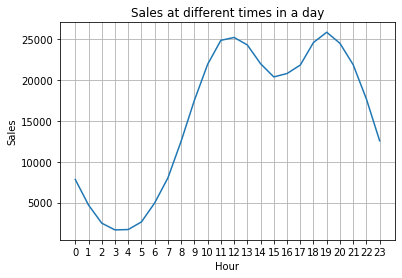

In [178]:
hours = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours , all_data.groupby(['Hour'])['Sales'].count() )
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.title("Sales at different times in a day")
plt.grid()
plt.show()

Distribution of sales over a period of Hours in a day.

### What products are mostly sold at different times of the day?

In [181]:
res_2 = all_data.groupby('Hour')['Product'].value_counts()
print(res_2.to_string())

Hour  Product                   
0     USB-C Charging Cable           976
      AAA Batteries (4-pack)         876
      Lightning Charging Cable       806
      AA Batteries (4-pack)          804
      Wired Headphones               800
      Apple Airpods Headphones       692
      Bose SoundSport Headphones     570
      27in FHD Monitor               364
      34in Ultrawide Monitor         304
      iPhone                         268
      Google Phone                   232
      27in 4K Gaming Monitor         224
      Flatscreen TV                  210
      ThinkPad Laptop                176
      Macbook Pro Laptop             174
      20in Monitor                   172
      Vareebadd Phone                112
      LG Dryer                        38
      LG Washing Machine              22
1     Lightning Charging Cable       566
      USB-C Charging Cable           558
      AAA Batteries (4-pack)         534
      AA Batteries (4-pack)          474
      Wired Headphones  

Below table indicates **products are mostly sold at different times of the day**

| Hour | Product Name | Quantity sold|
|------|--------------|--------------|
|0| USB-C Charging Cable | 976 |
|1|Lightning Charging Cable|566|
|2|USB-C Charging Cable|308|
|3|Lightning Charging Cable|198|
|4|Lightning Charging Cable|194|
|5|USB-C Charging Cable|326|
|6|USB-C Charging Cable|626|
|7|Lightning Charging Cable|972|
|8|Lightning Charging Cable|1478|
|9|USB-C Charging Cable|2016|
|10|USB-C Charging Cable|2604|
|11|USB-C Charging Cable|3048|
|12|USB-C Charging Cable|3002|
|13|USB-C Charging Cable|2888|
|14|USB-C Charging Cable|2594|
|15|Lightning Charging Cable|2432|
|16|USB-C Charging Cable|2484|
|17|Lightning Charging Cable|2628|
|18|USB-C Charging Cable|2902|
|19|USB-C Charging Cable|3056|
|20|USB-C Charging Cable|2888|
|21|USB-C Charging Cable|2546|
|22|Lightning Charging Cable|2148|
|23|Lightning Charging Cable|1424|

### Which time of day has the most sales?

By the above results, we can clearly say that the sales are high at 11am(11) in the morning and 7pm(19) in evening in a day.The best working hours are from 9am to 12pm in the morning and 5pm to 8pm in the evening.

### Pair of products that are most sold together

In [182]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston(MA),21
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland(OR),14
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco(CA),13
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles(CA),20
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin(TX),11


In [208]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston(MA),21
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland(OR),14
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco(CA),13
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles(CA),20
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin(TX),11


In [209]:
df.shape

(371900, 10)

In [210]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

In [212]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston(MA),21,"iPhone,iPhone"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland(OR),14,"Lightning Charging Cable,Lightning Charging Cable"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco(CA),13,"Wired Headphones,Wired Headphones"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles(CA),20,"27in FHD Monitor,27in FHD Monitor"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin(TX),11,"Wired Headphones,Wired Headphones"


In [214]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(20)

,Order ID,Grouped
0,141234.0,"iPhone,iPhone"
1,141235.0,"Lightning Charging Cable,Lightning Charging Cable"
2,141236.0,"Wired Headphones,Wired Headphones"
3,141237.0,"27in FHD Monitor,27in FHD Monitor"
4,141238.0,"Wired Headphones,Wired Headphones"
5,141239.0,"AAA Batteries (4-pack),AAA Batteries (4-pack)"
6,141240.0,"27in 4K Gaming Monitor,27in 4K Gaming Monitor"
7,141241.0,"USB-C Charging Cable,USB-C Charging Cable"
8,141242.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
9,141243.0,"Apple Airpods Headphones,Apple Airpods Headphones"


In [218]:
# now importing 2 libraries
from itertools import combinations
from collections import Counter

In [223]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(50)

[(('USB-C Charging Cable', 'USB-C Charging Cable'), 22095),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 21874),
 (('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)'), 20833),
 (('AA Batteries (4-pack)', 'AA Batteries (4-pack)'), 20717),
 (('Wired Headphones', 'Wired Headphones'), 19022),
 (('Apple Airpods Headphones', 'Apple Airpods Headphones'), 15645),
 (('Bose SoundSport Headphones', 'Bose SoundSport Headphones'), 13433),
 (('27in FHD Monitor', '27in FHD Monitor'), 7543),
 (('iPhone', 'iPhone'), 6850),
 (('27in 4K Gaming Monitor', '27in 4K Gaming Monitor'), 6250),
 (('34in Ultrawide Monitor', '34in Ultrawide Monitor'), 6209),
 (('Google Phone', 'Google Phone'), 5537),
 (('Flatscreen TV', 'Flatscreen TV'), 4824),
 (('Macbook Pro Laptop', 'Macbook Pro Laptop'), 4736),
 (('ThinkPad Laptop', 'ThinkPad Laptop'), 4136),
 (('20in Monitor', '20in Monitor'), 4113),
 (('iPhone', 'Lightning Charging Cable'), 3025),
 (('Google Phone', 'USB-C Charging Cable'), 2973),
 (('Vareeba

**Pair of Two Same Products**<br></br>
By the above result, we can say that Pair of two **'USB-C Charging Cable'** are the most buying products together by the people.<br></br>
**Pair of Two different Products**<br></br>
By the result, I observed that pair of **'iPhone', 'Lightning Charging Cable'** are the most buying products together by the people


## Suggestion

1.The best way to attract and convert customers is to wow them with your amazing merch. See to it that you’re always stocking the right products. Then once you have the right merchandise, come up with creative displays and arrangements to make them pop.
2.When it comes to retail and social media, there are three platforms you should seriously consider: Facebook, Instagram, and Pinterest. These are the most consumer-centric networks, making them ideal for merchants. Pinterest has the added edge of being a platform people specifically go to conduct research before they purchase something.